<a href="https://colab.research.google.com/github/yuruojie777/NLP/blob/main/UNIKEY_COMP5046_Ass1_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the marker, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [2]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [3]:
# Preview of the data in the csv file, which has two columns: 
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [4]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

In [5]:
for post in training_posts[0:3]:
  print(post)

'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|

## 1.1. URL Removal
*related to the section 4.2*

In [6]:
# Please comment your code
# Remove URL in text

import re
# Url pattern
URL_Pattern = 'http\S+'

training_posts = [re.sub(URL_Pattern, '', post) for post in training_posts]
testing_posts = [re.sub(URL_Pattern, '', post) for post in testing_posts]

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [7]:
# Please comment your code
# Map contraction to full words
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
            "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
            "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
            "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
            "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
            "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
            "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
            "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
            "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
            "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
            "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
            "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
            "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
            "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
            "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
            "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
            "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
            "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
            "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
            "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
            "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
            "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def mapToContraction_dict(x):
  words = x[1:-1].split(' ')
  link = ' '
  result_words = []
  for word in words:
    if word in contraction_dict.keys():
      result_words.append(contraction_dict[word])
    else: result_words.append(word)
  result = link.join(result_words)
  return result
  

training_posts = [mapToContraction_dict(post) for post in training_posts]
testing_posts = [mapToContraction_dict(post) for post in testing_posts]

for post in training_posts[0:3]:
  print(post)


 and intj moments    sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your life?|||     On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~    ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390     ...|||Welcome and stuff.|||  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I do not mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you have determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by...|||All things in m

In [8]:
# Remove puncts
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x
training_posts = [remove_punctuation(post) for post in training_posts]
testing_posts = [remove_punctuation(post) for post in testing_posts]

for post in training_posts[0:3]:
  print(post)

 and intj moments    sportscenter not top ten plays    pranksWhat has been the most lifechanging experience in your life     On repeat for most of todayMay the PerC Experience immerse youThe last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace    ENFJ7 Sorry to hear of your distress Its only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as84389  84390     Welcome and stuff  Game Set MatchProzac wellbrutin at least thirty minutes of moving your legs and I do not mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternativeBasically come up with three items you have determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left byAll things in moderation  Sims is indeed a video game and a good one at that Note a

In [9]:
# Stop words removal
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize


def remove_stopwords(x, stop_words):
  tokens = word_tokenize(x)
  filtered_sentence = [w for w in tokens if not w in stop_words]
  return filtered_sentence

stop_words = sw.words()
training_posts = [remove_stopwords(post, stop_words) for post in training_posts]
testing_posts = [remove_stopwords(post, stop_words) for post in testing_posts]

for post in training_posts[0:3]:
  print(post)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['intj', 'moments', 'sportscenter', 'top', 'ten', 'plays', 'pranksWhat', 'lifechanging', 'experience', 'life', 'On', 'repeat', 'todayMay', 'PerC', 'Experience', 'immerse', 'youThe', 'last', 'thing', 'INFJ', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'Rest', 'peace', 'ENFJ7', 'Sorry', 'hear', 'distress', 'Its', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'Try', 'figure', 'hard', 'times', 'times', 'growth', 'as84389', '84390', 'Welcome', 'stuff', 'Game', 'Set', 'MatchProzac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'I', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternativeBasically', 'three', 'items', 'determined', 'type',

In [10]:
# Case folding and stemming
from nltk.stem.snowball import *
stemmer = SnowballStemmer('english')

def case_folding_and_stemming(x, stemmer):
  lowercase = [word.lower() for word in x]
  return [stemmer.stem(word) for word in lowercase]

training_posts_after_stemming = [case_folding_and_stemming(post, stemmer) for post in training_posts]
testing_posts_after_stemming = [case_folding_and_stemming(post, stemmer) for post in testing_posts]

In [11]:
for post in training_posts[0:3]:
  print(post)

['intj', 'moments', 'sportscenter', 'top', 'ten', 'plays', 'pranksWhat', 'lifechanging', 'experience', 'life', 'On', 'repeat', 'todayMay', 'PerC', 'Experience', 'immerse', 'youThe', 'last', 'thing', 'INFJ', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'Rest', 'peace', 'ENFJ7', 'Sorry', 'hear', 'distress', 'Its', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'Try', 'figure', 'hard', 'times', 'times', 'growth', 'as84389', '84390', 'Welcome', 'stuff', 'Game', 'Set', 'MatchProzac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'I', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternativeBasically', 'three', 'items', 'determined', 'type', 'whichever', 'types', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left', 'byAll', 'things', 'moderation', 'Sims', 'indeed', 'video', 'game', 'good', 'Note', 'good', 'somewhat', '

In [12]:
# Lemmatisation
#by NLTK Wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatisation(x, lemmatizer):
  return [lemmatizer.lemmatize(word) for word in x]

training_posts_after_lemmatisation = [lemmatisation(post, lemmatizer) for post in training_posts_after_stemming]
testing_posts_after_lemmatisation = [lemmatisation(post, lemmatizer) for post in testing_posts_after_stemming]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
for post in training_posts_after_lemmatisation[0:3]:
  print(post)

['intj', 'moment', 'sportscent', 'top', 'ten', 'play', 'prankswhat', 'lifechang', 'experi', 'life', 'on', 'repeat', 'todaymay', 'perc', 'experi', 'immers', 'youth', 'last', 'thing', 'infj', 'friend', 'post', 'facebook', 'commit', 'suicid', 'next', 'day', 'rest', 'peac', 'enfj7', 'sorri', 'hear', 'distress', 'it', 'natur', 'relationship', 'perfect', 'time', 'everi', 'moment', 'exist', 'tri', 'figur', 'hard', 'time', 'time', 'growth', 'as84389', '84390', 'welcom', 'stuff', 'game', 'set', 'matchprozac', 'wellbrutin', 'least', 'thirti', 'minut', 'move', 'leg', 'i', 'mean', 'move', 'sit', 'desk', 'chair', 'weed', 'moder', 'mayb', 'tri', 'edibl', 'healthier', 'alternativebas', 'three', 'item', 'determin', 'type', 'whichev', 'type', 'would', 'like', 'use', 'given', 'type', 'cognit', 'function', 'whatnot', 'left', 'byall', 'thing', 'moder', 'sim', 'inde', 'video', 'game', 'good', 'note', 'good', 'somewhat', 'subject', 'i', 'complet', 'promot', 'death', 'given', 'simdear', 'enfp', 'what', 'favo



---



# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [23]:
# Please comment your code
# Generate a dictionary

def generate_dict(posts):
  result = []
  for post in posts:
    result += post;
  word_list = list(set(result))
  word_dict = {w: i for i, w in enumerate(word_list)}
  return word_dict


word_dict = generate_dict(training_posts_after_lemmatisation)
word_list = list(word_dict.keys())

In [19]:
# skip-gram

skip_grams = []

for sentence in training_posts_after_lemmatisation:
    for i in range(len(sentence)):
        centre = word_dict[sentence[i]]
        if i > 0 and i < len(sentence)-1:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]
        elif i == 0:
            context = [word_dict[sentence[i + 1]]]
        else:
            context = [word_dict[sentence[i - 1]]]

        # skipgrams - (centre, context[0]), (centre, context[1])..
        for w in context:
            skip_grams.append([centre, w])

print(skip_grams[0:20])


[[189814, 37189], [37189, 189814], [37189, 216117], [216117, 37189], [216117, 206793], [206793, 216117], [206793, 132011], [132011, 206793], [132011, 212094], [212094, 132011], [212094, 159253], [159253, 212094], [159253, 113250], [113250, 159253], [113250, 137859], [137859, 113250], [137859, 53169], [53169, 137859], [53169, 29949], [29949, 53169]]


In [21]:
import numpy as np

voc_size = len(word_dict)
def prepare_batch(data_temp):
    inputs = []
    labels = []

    for i in range(len(data_temp)):
        input_temp = [0]*voc_size
        input_temp[data_temp[i][0]] = 1 # one-hot input
        inputs.append(input_temp)  # centre
        labels.append(data_temp[i][1])  # context word

    return np.array(inputs), np.array(labels)



ahahahahaa  :  0.084751934   -0.07768143
aboutmayb  :  0.70879185   0.3381256
scorpio  :  2.2886639   0.45461097
puppetri  :  0.49424502   -0.13929817
hugsbut  :  0.31734547   0.08991879
cutiemi  :  0.31742036   0.1881101
damnim  :  0.77510864   0.11528301
therefre  :  0.037158437   -0.025204146
nonwritten  :  0.056854513   -0.14386277
beekeeperyup  :  0.14389177   0.071851574
speechmanner  :  0.26620248   0.03839971
torav  :  0.22506934   -0.040902197
happendont  :  0.24059756   0.14594649
profileshadowman  :  0.24098954   0.05499279
metac  :  0.15065365   -0.10897935
differentdepend  :  0.39992774   0.18133001
sixtyopinion  :  0.1757297   0.16244416
countrysid  :  2.0206518   0.34428036
pointperson  :  0.31027347   -0.17377302
onbut  :  0.5632482   -0.10076613
thesehun  :  0.08959111   -0.10351472
aaaaaaaaand  :  0.018876232   -0.12314385
mise  :  0.28634316   0.058146525
mindnon  :  0.22712266   -0.032514516
youvembti  :  0.4004932   0.1308531
geoengin  :  0.42468938   0.09026724
eh

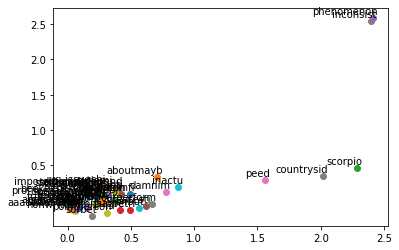

In [24]:
import pprint
import matplotlib
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

wv_sg_model = Word2Vec(sentences=training_posts_after_lemmatisation, size=2, window=2, min_count=1, workers=2, sg=1)

# Visualise result
for i, label in enumerate(word_list[0:50]):
    x, y = wv_sg_model.wv[label][0], wv_sg_model.wv[label][1]
    print (label, " : ", x, " " , y) # uncomment to see the detailed vector info
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
# Please comment your code



## 2.3. Input Concatenation
*related to the section 4.3*

In [ ]:
# Please comment your code

# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [ ]:
# Please comment your code

### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
# Please comment your code

# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)




In [ ]:
# Please comment your code

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
# Please comment your code

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
# Please comment your code

## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
# Please comment your code

## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
# Please comment your code

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [ ]:
#@title Personality Type Prediction

text = "" #@param {type:"string"}


Predicted Personality Type: T


# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section